# Import Necessary Libraries

#### Let us import necessary libraries to get started!

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

Let's start by reading in the Admission_Predict.csv file into a pandas dataframe.

In [6]:
#read_csv is a pandas function to read csv files
data = pd.read_csv(r'/content/drive/MyDrive/Admission_Predict.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#head() method is used to return top n (5 by default) rows of a DataFrame or series.
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
#let us drop Serial No. Column as it is not required for prediction
data.drop(["Serial No."],axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.

In [10]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [12]:
#Let us rename the column Chance of Admit because it has trainling space
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

# Exploratory Data Analysis


## Missing Data
We can use seaborn to create a simple heatmap to see where we have missing data!

In [13]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

#### Heatmap:It is way of representing the data in 2-D form.It gives coloured visual summary of the data

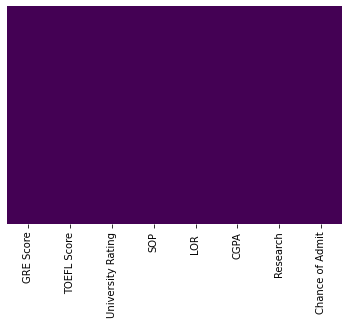

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


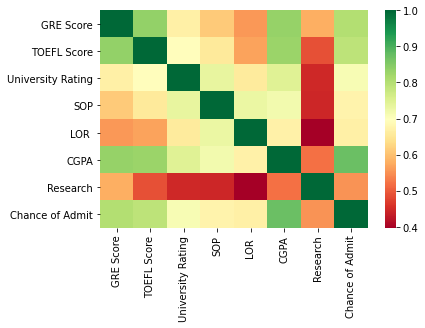

In [16]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="RdYlGn")

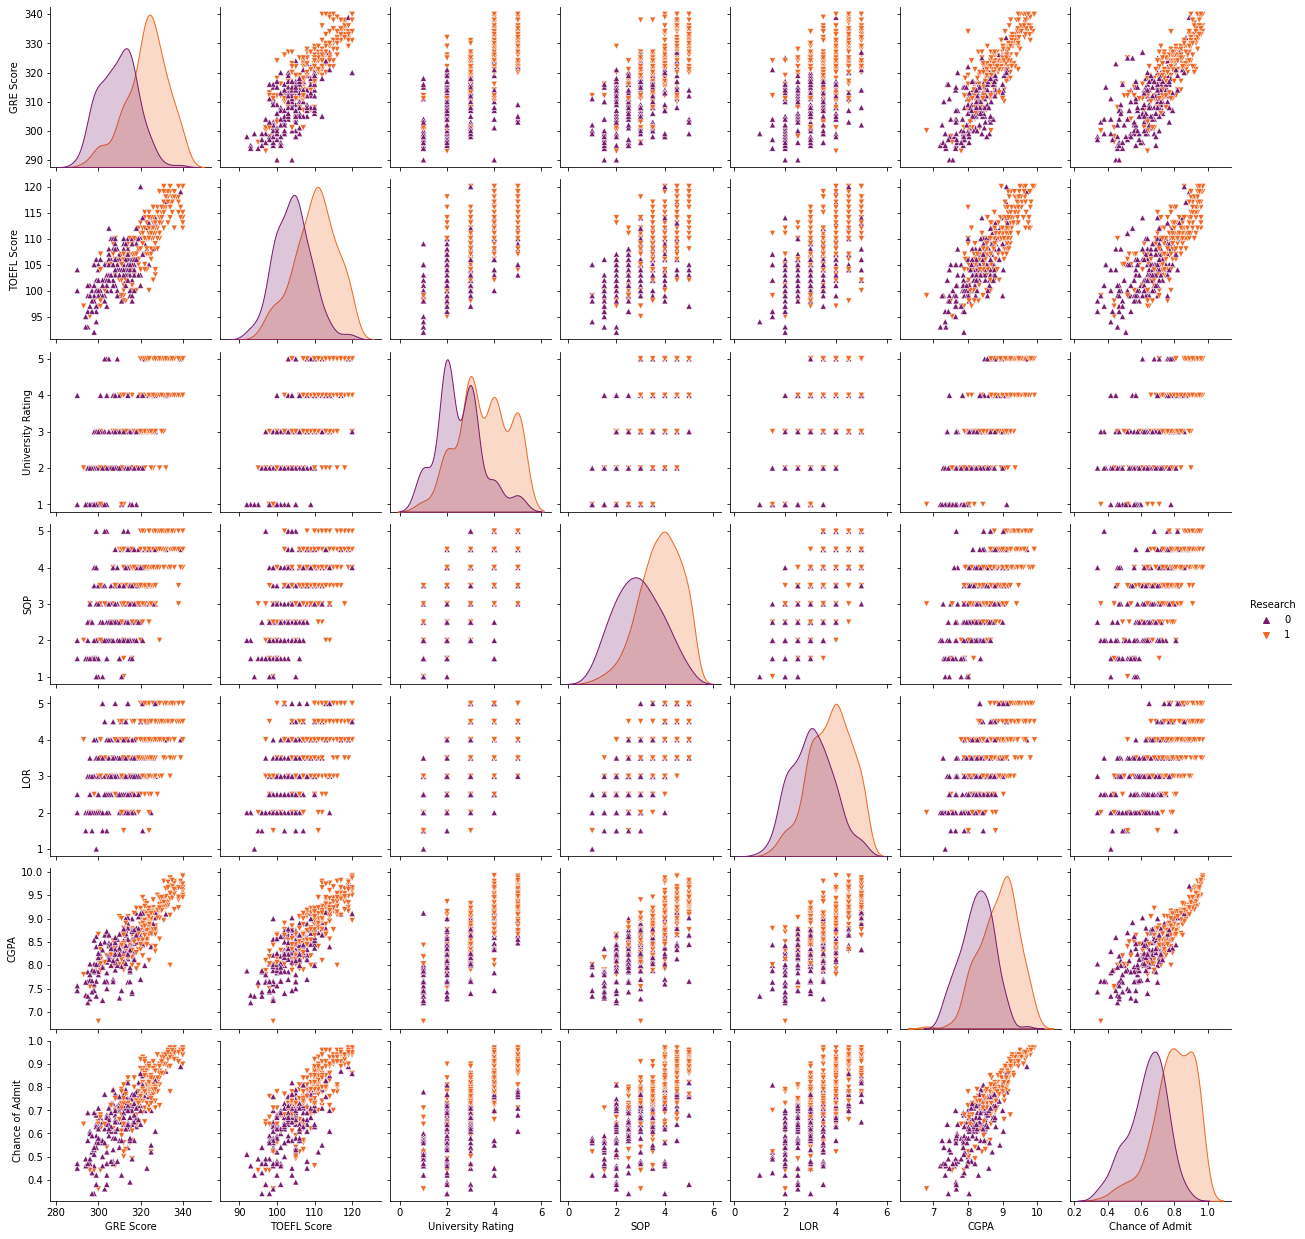

In [17]:
sns.pairplot(data=data,hue='Research',markers=["^", "v"],palette='inferno')

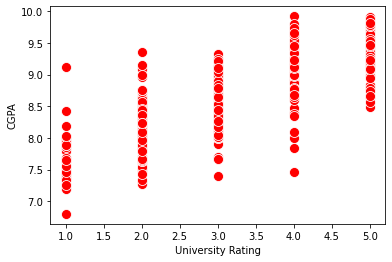

In [18]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

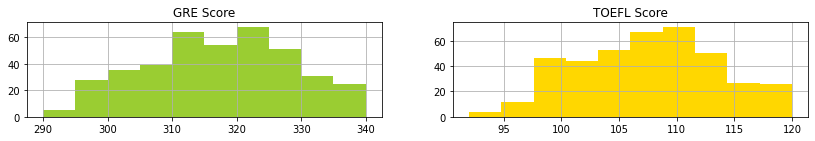

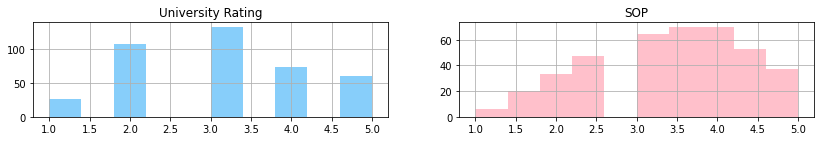

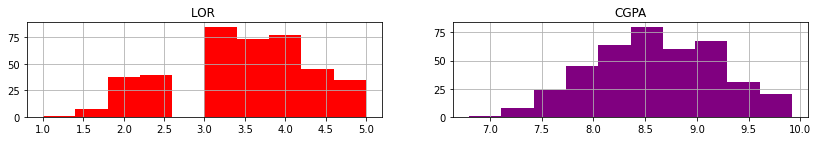

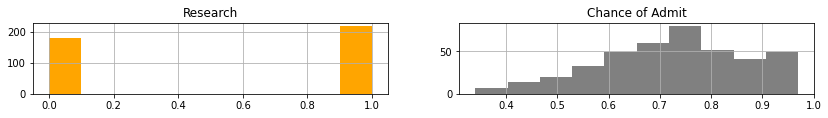

In [19]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(i,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [20]:
print('Mean CGPA Score is :',int(data['CGPA'].mean()))
print('Mean GRE Score is :',int(data['GRE Score'].mean()))
print('Mean TOEFL Score is :',int(data['TOEFL Score'].mean()))
#print('Mean University rating is :',int(data[data['University Rating']<=500].University Rating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107


# Machine Learning 



### 1.Let's start by splitting the data into dependent and independent variable

In [21]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
x=data.iloc[:,0:7].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [23]:
y=data.iloc[:,7:].values
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

### 2.Data Normalisation
There is huge disparity between the x values so we let us use feature scaling.
Feature scaling is a method used to normalize the range of independent variables or features of data. 



In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 0.85714286, 0.75      , ..., 0.875     , 0.84935897,
        1.        ],
       [0.44      , 0.39285714, 0.5       , ..., 0.75      , 0.63461538,
        0.        ],
       [0.86      , 0.89285714, 0.75      , ..., 0.75      , 0.91666667,
        1.        ]])

### 3.Splitting our data into a training set and test set .

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)
#random_state acts as the seed for the random number generator during the split

### Let us convert it into classification problem
chance of admit>0.5 as true
chance of admit<0.5 as false

In [26]:
y_train=(y_train>0.5)
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [27]:
y_test=(y_test>0.5)

In [28]:
from sklearn.linear_model.logistic import LogisticRegression
cls =LogisticRegression(random_state =0)

lr=cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred =lr.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
print(confusion_matrix(y_test,y_pred)) 



Accuracy score: 90.000000
Recall score : 99.074074
ROC score : 53.703704

[[  1  11]
 [  1 107]]


## Save the model to reuse it again

In [31]:
import pickle
pickle.dump(lr,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

#### Logistic Regression has a good accuracy score

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)
y_pred_mr=mr.predict(x_test)
y_pred_mr

array([[0.65214299],
       [0.89574893],
       [0.82120116],
       [0.89025204],
       [0.9035085 ],
       [0.86937533],
       [1.01028816],
       [0.66892925],
       [1.01075335],
       [0.97898533],
       [0.9900978 ],
       [0.84423415],
       [1.05376869],
       [1.19648445],
       [0.75508539],
       [1.00282976],
       [0.84217981],
       [0.8579719 ],
       [0.67541001],
       [0.84086627],
       [0.76929284],
       [0.81325108],
       [0.92808559],
       [0.73787869],
       [0.62355851],
       [0.97024943],
       [1.07190887],
       [0.87153214],
       [0.72042621],
       [0.94745064],
       [0.85630038],
       [0.80854574],
       [0.74916843],
       [1.06736167],
       [0.75995933],
       [0.77939572],
       [0.93597561],
       [0.7832262 ],
       [0.95070163],
       [0.94895826],
       [0.78606614],
       [1.0768282 ],
       [1.08352311],
       [0.87394622],
       [0.83820445],
       [1.16692376],
       [0.8539752 ],
       [0.943

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.16805367788399572

In [34]:
#import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=0)
#n_estimators no of decision trees
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred=rf.predict(x_test)
y_pred[0:5]

array([0.374, 0.808, 0.943, 1.   , 1.   ])

In [36]:
y_test[0:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.15114518518518516

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=25,p=1)
#n_estimators no of decision trees
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=1,
                    weights='uniform')

In [39]:
y_pred=rf.predict(x_test)
y_pred[0:5]

array([0.374, 0.808, 0.943, 1.   , 1.   ])

In [40]:
y_test[0:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.15114518518518516

# svm

In [42]:
from sklearn.svm import SVR
svr=SVR()
#n_estimators no of decision trees
svr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.15114518518518516

In [44]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)
predictions=clf.predict(x_test)
predictions=clf.predict(x_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 12.49% 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)
predictions=clf.predict(x_test)
predictions=clf.predict(x_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 12.49% 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.14508333333333334
MSE: 0.08027083333333333
RMSE: 0.28332107816633295


In [48]:
metrics.r2_score(y_test, y_pred)

0.10810185185185184